In [ ]:
PROGRAMMING DOMAIN : OBJECT ORIENTED PROGRAMMING, ML.

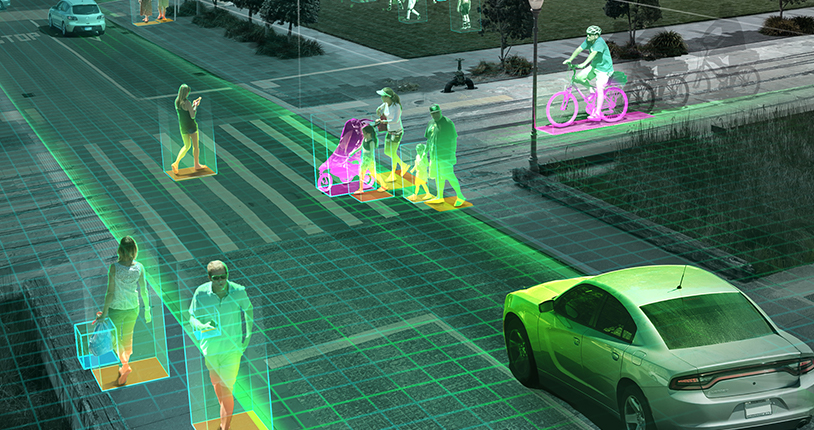

In [ ]:
from IPython.display import Image
Image(filename='opencv.png', height=300, width=600)

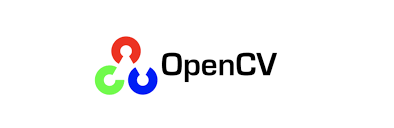

In [ ]:
from IPython.display import Image
Image(filename='l.png', height=300, width=600)

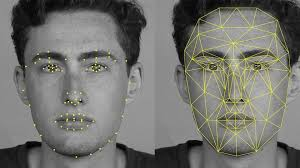

In [ ]:
from IPython.display import Image
Image(filename='hcs.png', height=300, width=600)

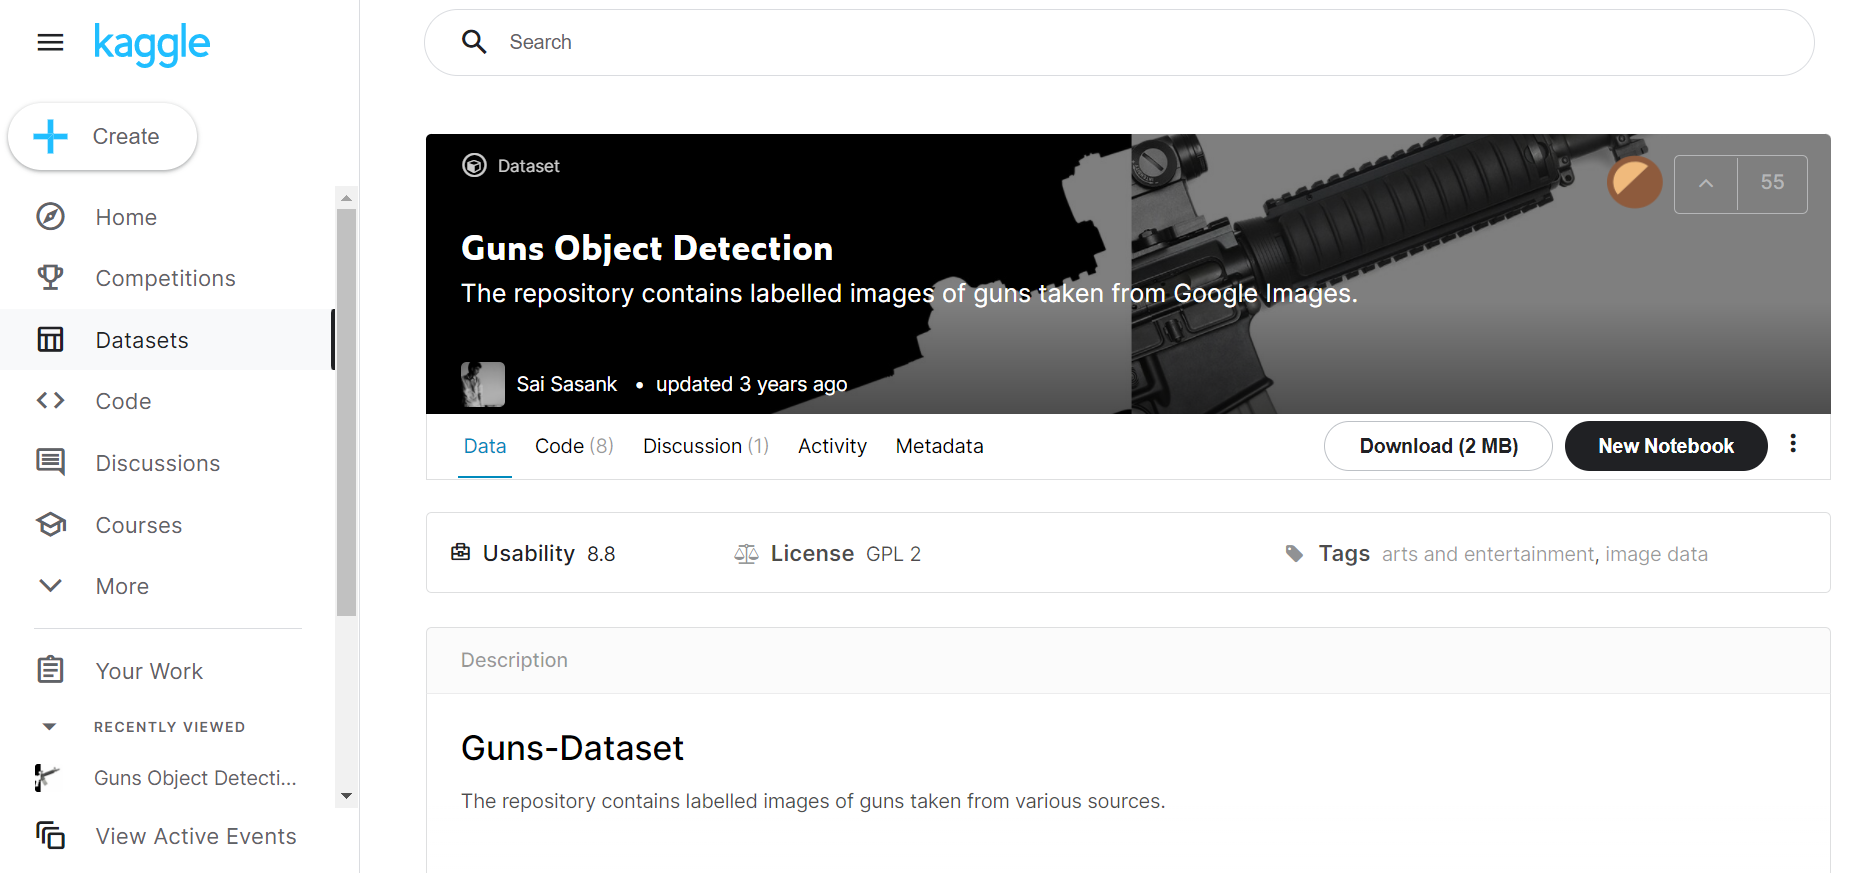

In [ ]:
from IPython.display import Image
Image(filename='step1.png', height=300, width=600)

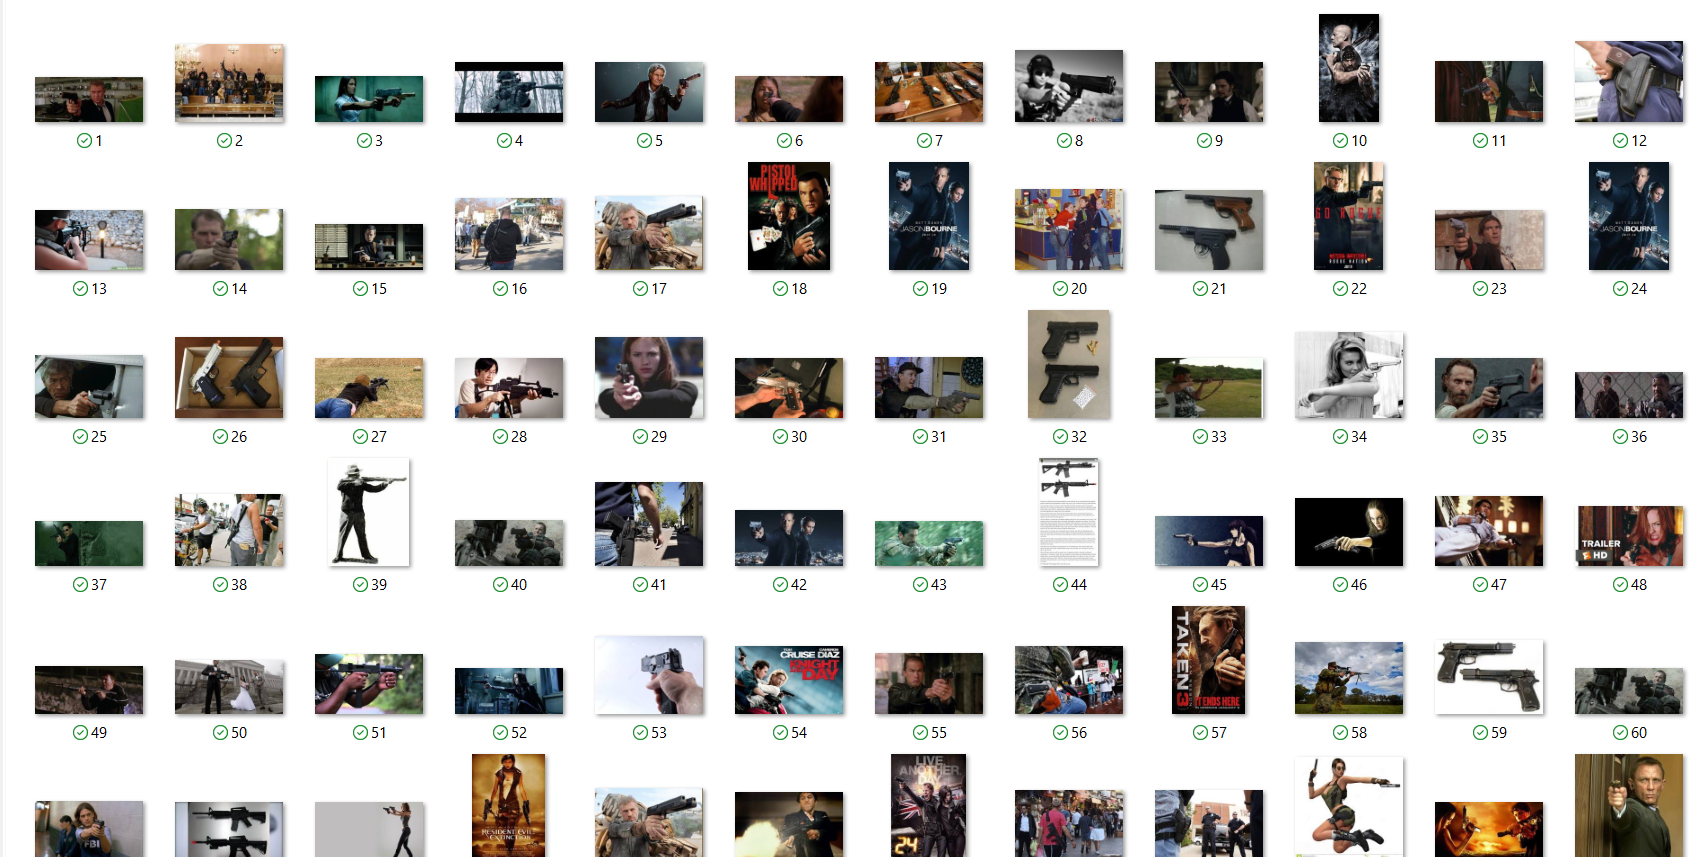

In [ ]:
from IPython.display import Image
Image(filename='step2.png', height=300, width=600)

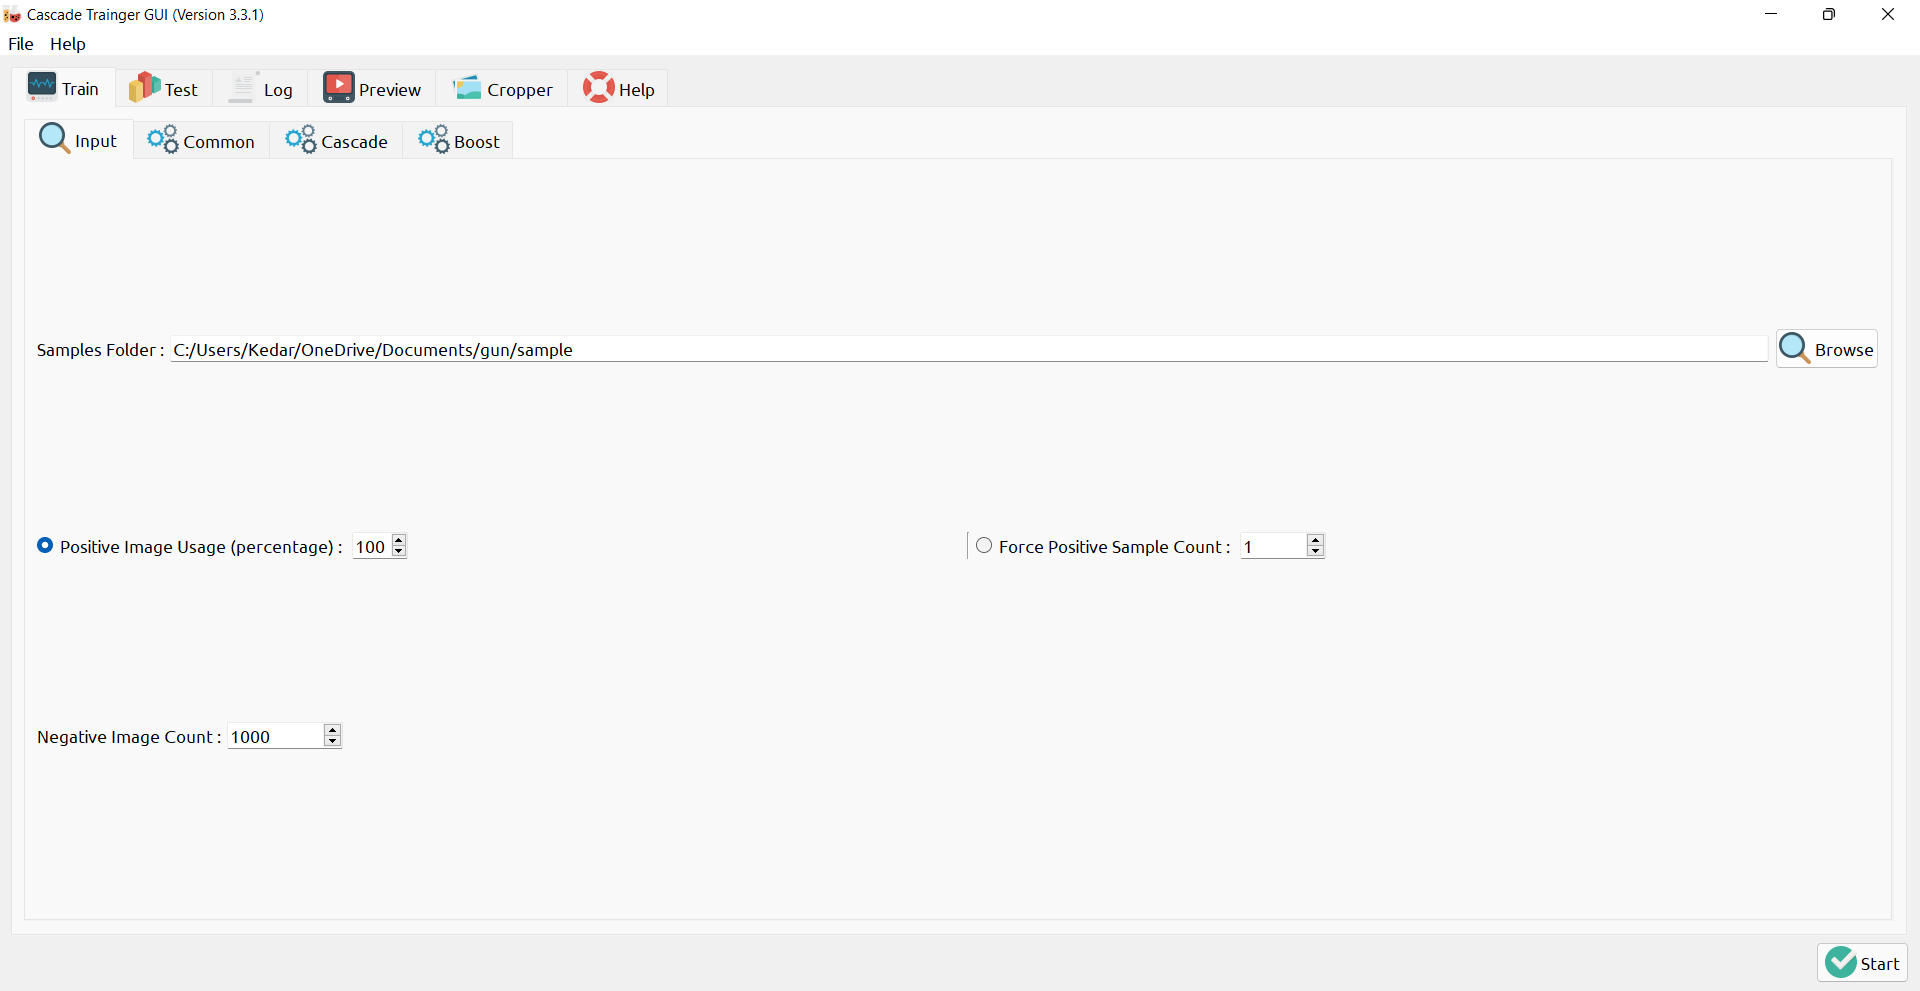

In [ ]:
from IPython.display import Image
Image(filename='step3.png', height=300, width=600)

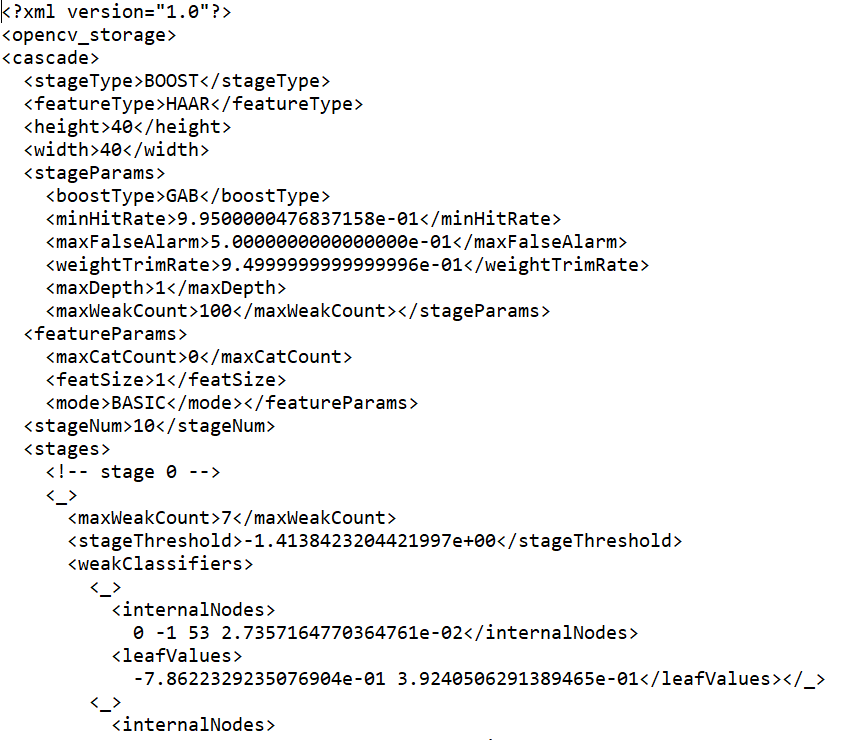

In [ ]:
from IPython.display import Image
Image(filename='step4.png', height=300, width=600)

In [ ]:
import cv2
import numpy as np

In [ ]:
cv2.VideoCapture(0): #Means first camera or webcam.
cv2.VideoCapture(1):  #Means second camera or webcam.
cv2.VideoCapture("file name.mp4"): #Means video file
cv2.VideoCapture('rtsp://192.168.1.64/1') #from mobile using IP webcam

In [ ]:
gun_cascade = cv2.CascadeClassifier('guns.xml')
fire_cascade = cv2.CascadeClassifier('fire.xml')

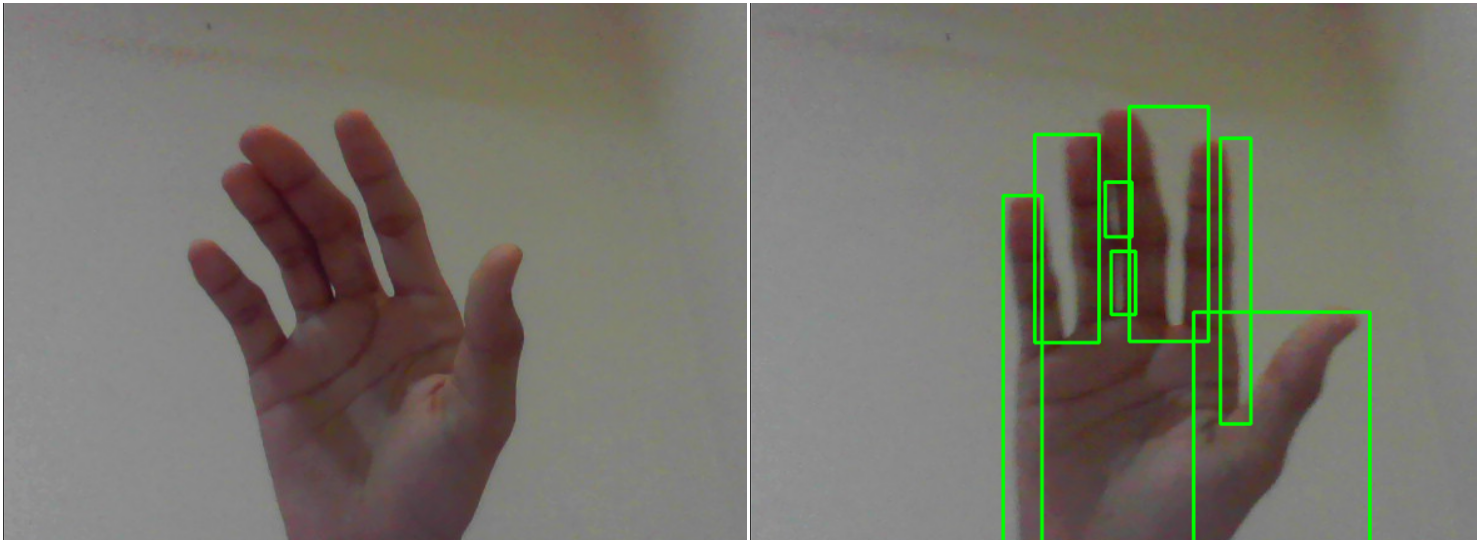

In [ ]:
from IPython.display import Image
Image(filename='md.png', height=800, width=400)

In [ ]:
ret, frame1 = cap.read()
ret, frame2 = cap.read()

In [ ]:
while cap.isOpened():
    #cv2.absdiff() is a method used to compare two images/frames
    diff = cv2.absdiff(frame1, frame2)
    #convert the difference calculated to grayscale in order to apply threshold on it
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    #Gaussian blur a widely used effect in graphics software, typically to reduce image noise and reduce detail.
    # Applying a Gaussian blur has the effect of reducing the image's high-frequency components
    # it allows us to provide different weight kernel in x and y directions
    #here kernel is set as (5,5) which is the value pixels are compared to
    blur= cv2.GaussianBlur(gray, (5,5), 0)
    #apply binary threshold on grayscale difference
    # here all pixels of intensity less than 20 will become black and those with more than 20 will become white
    _, th = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    #dilate threshold image to fill in all the holes
    #With binary images, dilation connects areas that are separated by spaces smaller than the structuring element
    #iterations is the number of times we want to perform dilation of our image
    dil= cv2.dilate(th, None, iterations=3)
    #find the contours in this thresholded image
    #RETR_TREE is the contour mode which is a hierarchy type ,such that contours present inside other contours have higher heirarchy
    #CHAIN_APPROX_NONE is a contour approximation method
    contours, _ = cv2.findContours(dil, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    #draw rectangles around any found contour
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)

        if cv2.contourArea(contour) < 700:
            continue
        cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
    #display video
    cv2.imshow("feed", frame1)
    #update frame to next frame
    frame1 = frame2
    ret, frame2 = cap.read()
    if cv2.waitKey(40)==27:
        break

In [ ]:
cv2.destroyAllWindows()

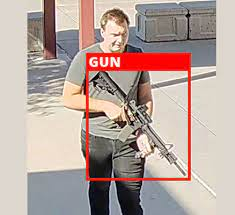

In [ ]:
from IPython.display import Image
Image(filename='gun.png', height=200, width=400)

In [ ]:
from firebase_admin import credentials, initialize_app, storage


import numpy as np
import cv2
import imutils
from datetime import datetime 
import pyrebase



firebase = pyrebase.initialize_app(firebaseConfig)
db = firebase.database()
db.child("Secureit").update({"gun":0})
  
   
gun_cascade = cv2.CascadeClassifier('gun_cascade.xml')
camera = cv2.VideoCapture(0)
   
firstFrame = None
gun_exist = 0

cred = credentials.Certificate("it-ad2f8-b5c158d2ca40.json")
initialize_app(cred, {'storageBucket': 'it-ad2f8.appspot.com'})
bucket = storage.bucket()


count = 0
while True:
      
    ret, frame = camera.read()
   
    frame = imutils.resize(frame, width = 500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
       
    gun = gun_cascade.detectMultiScale(gray,
                                       1.9, 6,
                                       minSize = (100, 100))
       
    if len(gun) > 0:
        gun_exist+=1
           
    for (x, y, w, h) in gun:
          
        frame = cv2.rectangle(frame,
                              (x, y),
                              (x + w, y + h),
                              (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]  
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, 'Gun Detected', (x + 6, y - 6), font, 0.5, (0, 0, 255), 1)  
   
    if firstFrame is None:
        firstFrame = gray
        continue
   
    cv2.imshow("Security Feed", frame)
    if(cv2.waitKey(2)==27):
                break
      
    if (gun_exist > 12):
        print("guns detected")
        db.child("Secureit").update({"gun":1})
        gun_exist = 0
        del gun

        ct = datetime.now()
        ts = ct.timestamp()

        filename = str(ts) + ".jpg"
        cv2.imwrite(filename, frame)
        blob = bucket.blob(filename)
        blob.upload_from_filename(filename)
        blob.make_public()
        data = {"imageUrl":blob.public_url, "name":filename}
        db.child("Uploads").push(data)

        count += 1
    
  

camera.release()
cv2.destroyAllWindows()





# cred = credentials.Certificate("ppl-mini-d9f0724348fd.json")
# initialize_app(cred, {'storageBucket': 'ppl-mini.appspot.com'})

# bucket = storage.bucket()
# blob = bucket.blob(filename)
# blob.upload_from_filename(filename)
# a = blob.public_url

In [ ]:
import cv2

fire_cascade = cv2.CascadeClassifier('cascade.xml')

cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    fire = fire_cascade.detectMultiScale(frame, 1.2, 5)

    for (x,y,w,h) in fire:
        cv2.rectangle(frame,(x-20,y-20),(x+w+20,y+h+20),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        print("fire is detected")


    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    

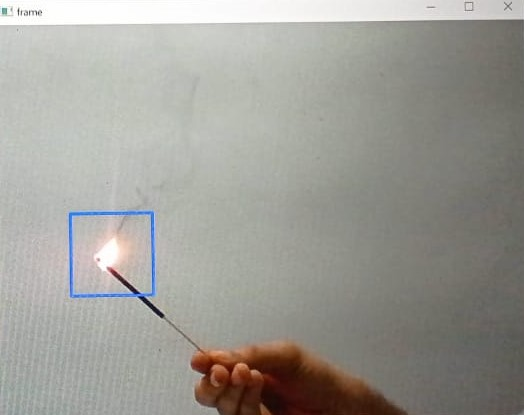

In [ ]:
from IPython.display import Image
Image(filename='fireDetected.jpeg', height=800, width=400)

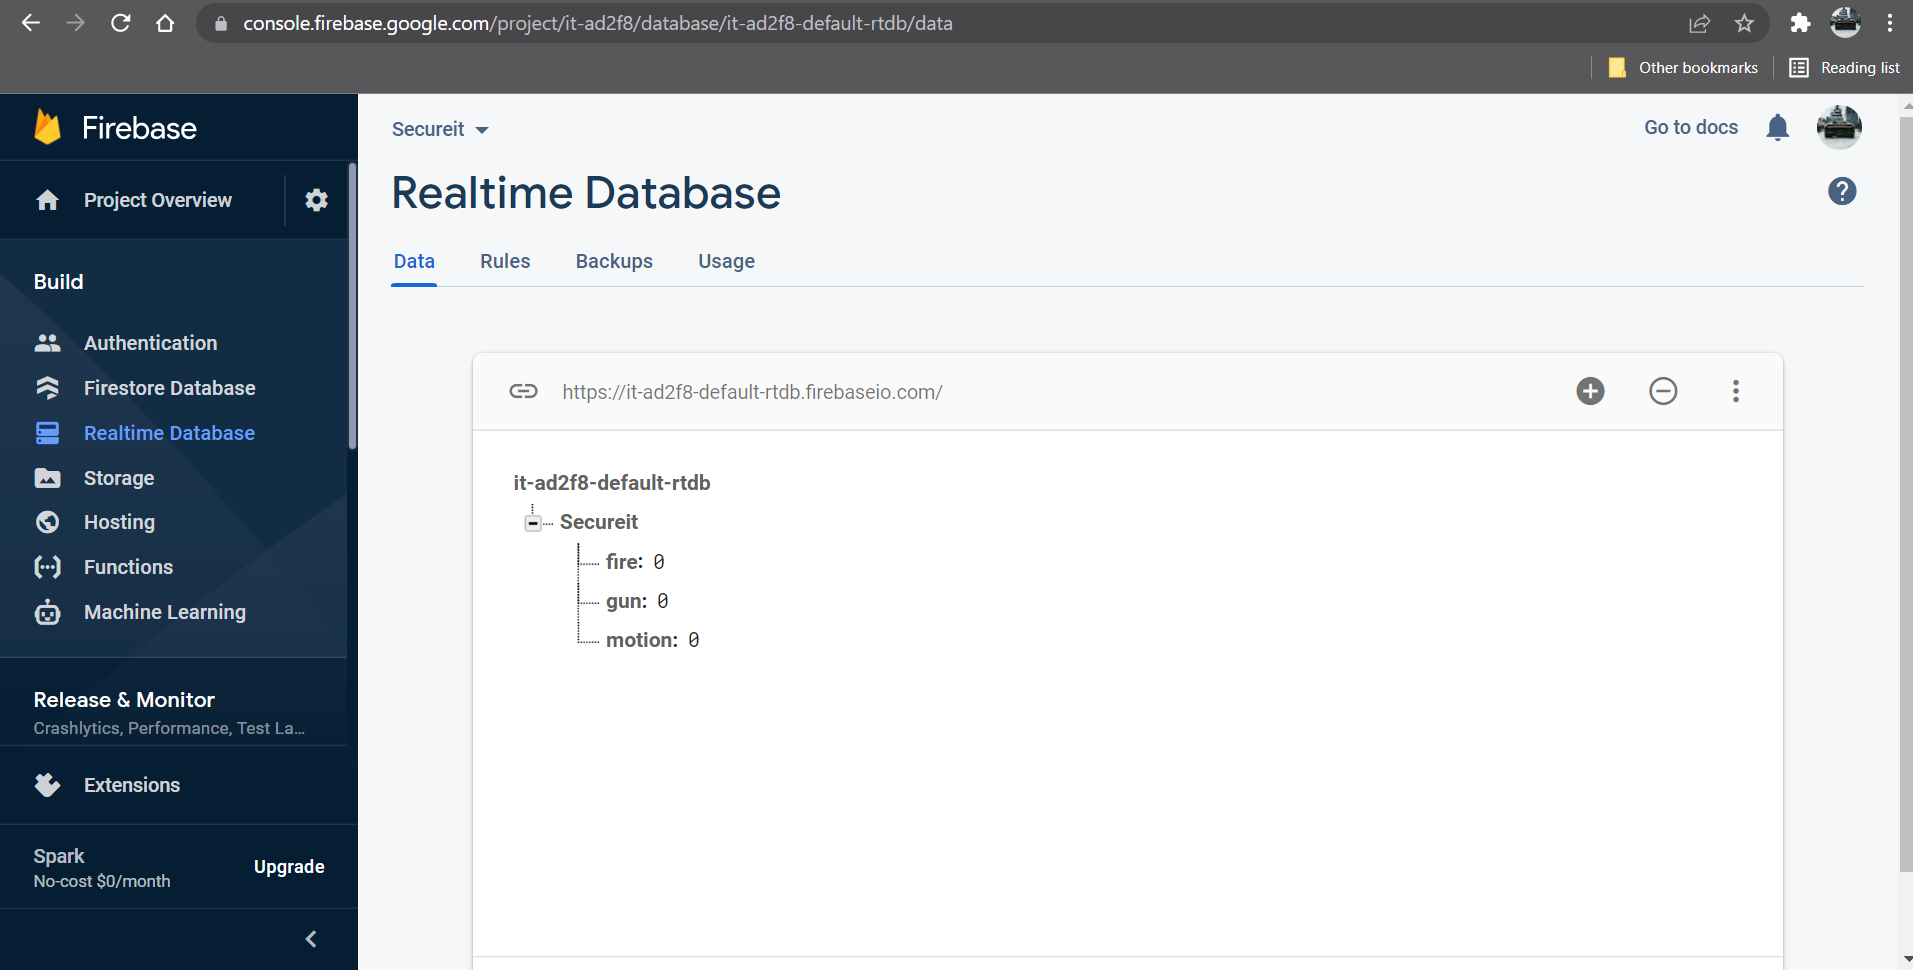

In [ ]:
from IPython.display import Image
Image(filename='fb.png', height=200, width=400)

In [ ]:
SS of Secureit :

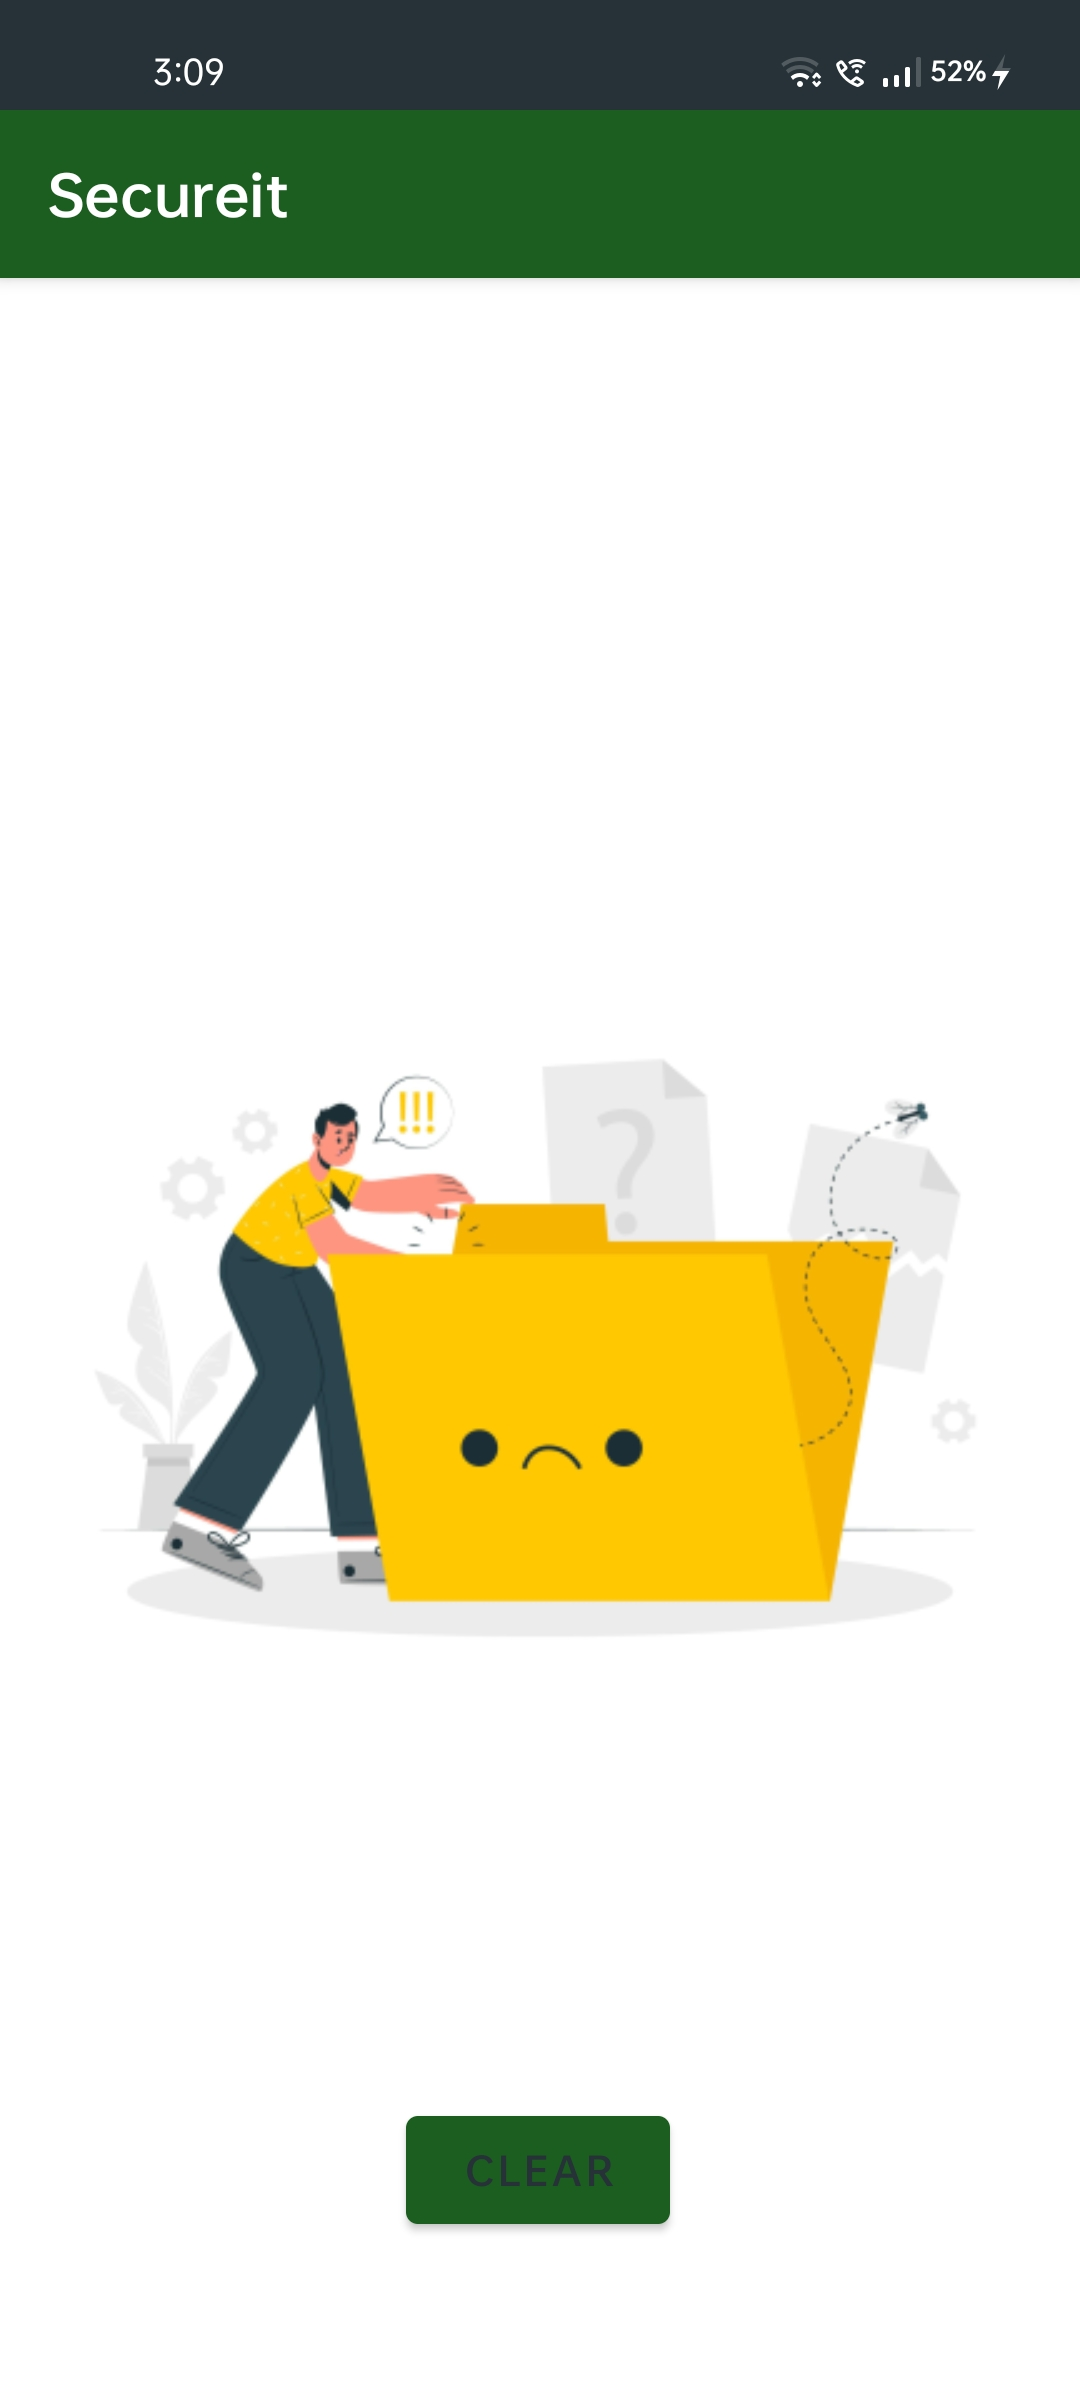

In [ ]:
from IPython.display import Image
Image(filename='secureit.jpeg', height=200, width=400)

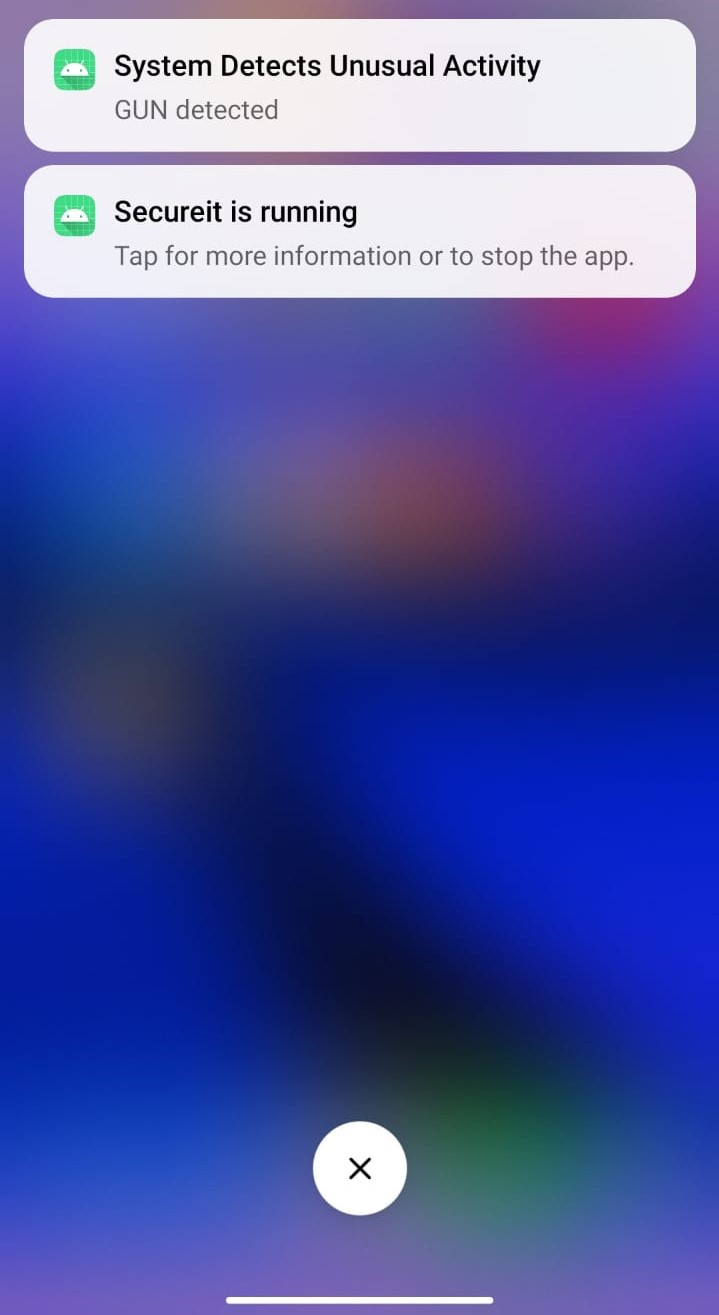

In [1]:
from IPython.display import Image
Image(filename='alert.jpeg', height=200, width=400)